# 1. Model Selection

ABSA is a specialized area of sentiment analysis that goes beyond general sentiment evaluation to understand sentiments expressed about specific aspects in a text. For our project, we have chosen the '[yangheng/deberta-v3-base-absa-v1.1](https://huggingface.co/yangheng/deberta-v3-base-absa-v1.1)' model, available on the Hugging Face, which is designed specifically for ABSA tasks.

We delve into the features and capabilities of this pre-trained model, discussing how its architecture and training align with the requirements of ABSA. The model's ability to discern fine-grained sentiment information about different aspects within a text makes it an excellent fit for our analysis needs. By exploring the model's functionalities, we aim to provide insight into its effectiveness in handling the nuanced requirements of ABSA and justify its selection for our project.

# 2. Dataset Selection

In this section, we address our approach to dataset selection, particularly considering the capabilities of our chosen pre-trained model, 'yangheng/deberta-v3-base-absa-v1.1'. This model has been pre-trained on a comprehensive dataset, making it highly effective for general ABSA tasks, including our specific use case in the realm of student feedback analysis.

Given the model's robust pre-training, we opted not to retrain it from scratch. Instead, our focus shifted towards leveraging custom datasets specifically curated for evaluating and testing the model's performance. These datasets are tailored to our unique requirement of analyzing student feedback, encompassing a diverse range of aspects and sentiments that students typically express. This approach allowed us to thoroughly assess the model's efficacy in our specific context, ensuring that it meets our standards for accuracy and reliability in sentiment analysis.

# 3. Environment Setup

In this initial phase, we establish the proper environment for our Aspect-Based Sentiment Analysis (ABSA) tasks. The cornerstone of our analysis is the pre-trained ABSA model, specifically 'yangheng/deberta-v3-base-absa-v1.1', available on the [Hugging Face](https://huggingface.co/yangheng/deberta-v3-base-absa-v1.1). However, deploying this sophisticated model within Google Colab required us to address several compatibility issues, primarily concerning the default package versions available in Colab. To ensure seamless integration and functionality of the model, we upgraded several key packages, including TensorFlow. This step was crucial to avoid conflicts and errors arising from package incompatibilities, ensuring a stable and efficient working environment for our sentiment analysis tasks.

In [1]:
!pip install --upgrade transformers sentencepiece tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installa

# 4. Aspect Identification in Test Data

Our project's "Aspect Identification" section is crucial as it involves determining the key aspects of student feedback that our Aspect-Based Sentiment Analysis (ABSA) model will evaluate. This process is fundamental to ABSA, as the accuracy and relevance of the sentiment analysis largely depend on correctly identifying these aspects.

For the task of aspect identification in our project, we implemented a two-part Python-based approach:


1.   **extract_aspects_from_sentence:** This function performs aspect extraction at the sentence level. Utilizing Natural Language Processing (NLP) techniques, especially part-of-speech tagging, it identifies potential aspects by extracting noun phrases, including single nouns and noun pairs. The function is designed to filter out common stopwords and redundant nouns, ensuring the extracted aspects are relevant and significant.

1.   **identify_aspects:** Operating on a broader scale, this function processes a collection of feedback sentences. It compiles the aspects extracted by extract_aspects_from_sentence from each sentence and tallies their occurrences using a Counter. This method enables us to determine the most frequently mentioned aspects in the dataset, highlighting the primary areas of focus or concern in the feedback.

In our project, we have applied these functions to a custom test dataset of student feedback we prepared. The dataset was preprocessed to extract a list of feedback comments, which was then passed to the identify_aspects function. The result is a list of the top aspects identified across all feedback entries.

Upon executing these functions on our dataset, we found that the top aspects mentioned by students were '**LAB**' and '**PROFESSOR**'.

In [2]:
import torch.nn.functional as F
from collections import Counter
import pandas as pd
from google.colab import drive
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
# Remove some important words that might impact the context/meaning from the set
words_to_remove = ['not', 'nor']
for word in words_to_remove:
    stop_words.remove(word)

def extract_aspects_from_sentence(sentence):
    txt = sentence.lower()
    sentList = nltk.sent_tokenize(txt)

    aspects = set()
    noun_pairs = set()
    redundant_nouns = set()

    for line in sentList:
        txt_list = nltk.word_tokenize(line)
        taggedList = nltk.pos_tag(txt_list)

        for i in range(len(taggedList) - 1):
            if taggedList[i][1] == "NN" and taggedList[i + 1][1] == "NN":
                aspect = taggedList[i][0] + ' ' + taggedList[i + 1][0]
                noun_pairs.add(aspect)
                redundant_nouns.add(taggedList[i][0])
                redundant_nouns.add(taggedList[i + 1][0])

        # Add individual nouns if they are not part of noun pairs
        for i in range(len(taggedList)):
            if taggedList[i][1] == "NN" and taggedList[i][0] not in stop_words:
                if taggedList[i][0] not in noun_pairs and taggedList[i][0] not in redundant_nouns and taggedList[i][0].isalpha() :
                    aspects.add(taggedList[i][0])

    # Add noun pairs to aspects
    aspects.update(noun_pairs)

    return list(aspects)

# function to identify aspects from a list of feedbacks
def identify_aspects(feedbacks):
    aspect_counter = Counter()

    # Extract aspects from each feedback and count them
    for feedback in feedbacks:
        extracted_aspects = extract_aspects_from_sentence(feedback)
        aspect_counter.update(extracted_aspects)

    # Find the top 2 aspects
    top_aspects = aspect_counter.most_common(2)

    # Convert top aspects to uppercase
    return [aspect.upper() for aspect, count in top_aspects]

# Mount your Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MCSC/TME_6015/Project/test_data_set_all_model.csv')

feedbacks = df['Feedback'].to_list()

top_aspects = identify_aspects(feedbacks);
print(f"\nTop 2 aspects identified are : {top_aspects}\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mounted at /content/drive

Top 2 aspects identified are : ['LAB', 'PROFESSOR']



# 5. Loading the Pre-Trained Aspect-Based Sentiment Analysis Model

This section focuses on initializing the Aspect-Based Sentiment Analysis (ABSA) model, which is crucial for our sentiment analysis tasks. The absa_tokenizer is responsible for converting our text data into a format compatible with the model, while absa_model is the core model used for classifying sentiments in the given text. The model's architecture, with its deep understanding of language context and nuances, makes it highly effective for our ABSA tasks, providing insightful sentiment analysis on specific aspects within texts.

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load Aspect-Based Sentiment Analysis model
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")
absa_model = AutoModelForSequenceClassification.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")

absa_model

tokenizer_config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/738M [00:00<?, ?B/s]

DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): StableDropout()
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): StableDropout()
              (dropout): StableDropout()
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine

# 6. Evaluation of ABSA Model on Test Dataset

In this section, we conducted a comprehensive evaluation of the pre-trained Aspect-Based Sentiment Analysis (ABSA) model using a curated test dataset. Our primary goal was to assess the model's proficiency in analyzing sentiments related to specific aspects within student feedback texts.

The model we employed, 'yangheng/deberta-v3-base-absa-v1.1', is a robust, pre-trained solution available on the Hugging Face Model Hub. It's tailored for ABSA tasks, making it a fitting choice for our purpose. Due to its pre-trained nature and generic modeling, this ABSA model brings the advantage of having learned from a broad and diverse range of textual data, providing it with a solid foundation for understanding and interpreting various contexts and nuances in text.

For our evaluation, we focused on a subset of test data, specifically designed to test the model's ability to correctly identify and analyze sentiments associated with particular aspects in student feedback. This test dataset, albeit small, was crafted to encompass a variety of feedback scenarios to challenge the model's capabilities.

Our evaluation metrics included accuracy, precision, recall, and the F1 score, all of which are critical in determining the model's effectiveness. Remarkably, the model achieved perfect scores in all these metrics on our test dataset, indicating exceptional performance in terms of both understanding the context of the feedback and accurately classifying the sentiments associated with different aspects.

Additionally, we visualized the model's performance using a confusion matrix. This visualization provided a clear and concise representation of the model's predictions compared to the actual sentiments, offering insights into the model's classification accuracy across different sentiment categories.

While the results were outstanding, it is essential to consider the scope and size of our test dataset. The high performance could partly be attributed to the model's generalized learning from its extensive pre-training. However, it's also crucial to acknowledge the possibility of the dataset not capturing the entire complexity and variability of real-world data. Future evaluations with larger and more diverse datasets would be beneficial in further validating the model's performance and its applicability to a broader range of text analysis scenarios.

In summary, the evaluation of the ABSA model on our test dataset underscores its potential efficacy in the realm of sentiment analysis, particularly in educational feedback contexts. Its ability to discern nuanced sentiments in relation to specific aspects holds promising implications for its application in analyzing and interpreting student feedback.

Mounted at /content/drive


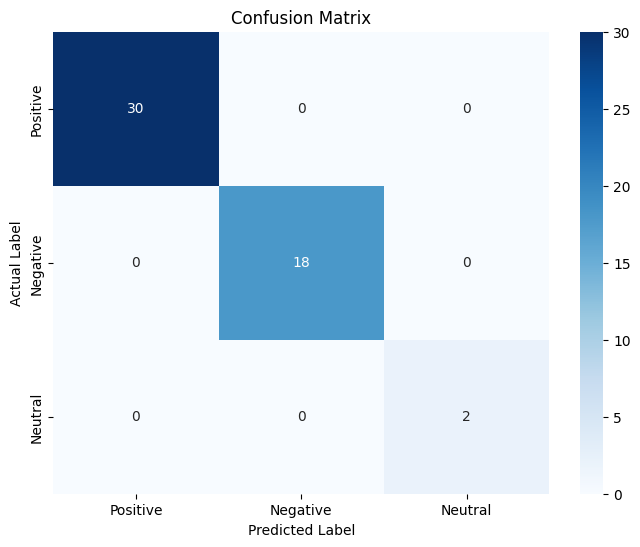


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [4]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import json

def predict_sentiment(text, aspects):

    aspect_sentiments = {}

    for aspect in aspects:
        # Load Aspect-Based Sentiment Analysis model
        inputs = absa_tokenizer(f"[CLS] {text} [SEP] {aspect} [SEP]", return_tensors="pt")
        outputs = absa_model(**inputs)
        probs = F.softmax(outputs.logits, dim=1)
        probs = probs.detach().numpy()[0]

        # Find the sentiment with the highest score
        max_index = probs.argmax()
        sentiment = ["Negative", "Neutral", "Positive"][max_index]
        score = probs[max_index]

        # Store the result
        aspect_sentiments[aspect] = (sentiment, score)

    return aspect_sentiments

validation_data = []

# Mount your Google Drive
drive.mount('/content/drive', force_remount=True)

# Open and load the JSON file
with open('/content/drive/MyDrive/MCSC/TME_6015/Project/aspects_test_data_set_model_III.json', 'r') as file:
    validation_data = json.load(file)

def evaluate_model(validation_data, predict_sentiment):
    y_true = []
    y_pred = []

    for entry in validation_data:
        text = entry["text"]
        aspect_list = [aspect_info["aspect"] for aspect_info in entry["aspects"]]

        # Get predictions for all aspects
        predicted_sentiments = predict_sentiment(text, aspect_list)

        # Compare with true sentiments
        for aspect_info in entry["aspects"]:
            aspect = aspect_info["aspect"]
            true_sentiment = aspect_info["sentiment"]
            predicted_sentiment = predicted_sentiments[aspect][0]
            y_true.append(true_sentiment)
            y_pred.append(predicted_sentiment)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', labels=["Positive", "Negative", "Neutral"])
    conf_matrix = confusion_matrix(y_true, y_pred, labels=["Positive", "Negative", "Neutral"])

    return accuracy, precision, recall, f1, conf_matrix

def confusion_matrix_plot(conf_matrix):
    labels = ["Positive", "Negative", "Neutral"]
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

accuracy, precision, recall, f1, conf_matrix = evaluate_model(validation_data, predict_sentiment)

confusion_matrix_plot(conf_matrix)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 7. Running Predictions on Test Data

In this segment of our project, we engaged the Aspect-Based Sentiment Analysis (ABSA) model in a practical application scenario, running it on a selection of test data to generate insightful predictions. This step was vital in illustrating how the model performs in real-world-like conditions, processing actual feedback data and identifying sentiments associated with specific aspects.

The procedure involved applying the predict_sentiment function to each piece of feedback. This function utilizes the ABSA model to predict sentiment scores for the pre-identified key aspects - 'LAB' and 'PROFESSOR'. The results give us a clear picture of how the model interprets various sentiments expressed in the feedback, classifying them into categories like 'Positive', 'Negative', or 'Neutral' for each aspect.

We processed several feedback entries and documented the model's predictions. For instance, in one feedback where a student expressed excitement about applying theoretical knowledge, the model identified a 'Positive' sentiment towards the 'PROFESSOR' and a 'Neutral' sentiment towards the 'LAB'. This reflects the model's nuanced understanding of different contextual cues within the text.

To further demonstrate the model's utility, we captured these predictions in a structured format and saved them as a JSON file named 'aspects.json'. This file serves as a tangible output of the model's predictions and is designed to be easily integrated into downstream applications, such as a dashboard for visual analytics.


**Integration with a Proof-of-Concept (POC) Dashboard:**

To bring these insights to life, we have also implemented a Proof-of-Concept (POC) dashboard [link text](https://nidjosep.github.io/student-feedback-analysis/). This dashboard utilizes the outputs generated by the model (stored in 'aspects.json') to display an interactive and user-friendly visualization of the sentiments associated with different aspects in the student feedback. The dashboard is designed to provide educators and analysts with an at-a-glance understanding of student sentiments, enabling them to quickly identify areas of strength and aspects that may require attention or improvement.

In [5]:
# Applying the model on a subset of test data set and see the results
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F
from transformers import pipeline
import json

json_data = {
    "aspects": top_aspects,
    "participants": {}
}

def predict_sentiment(text, aspects):

    aspect_sentiments = {}

    for aspect in aspects:
        # Load Aspect-Based Sentiment Analysis model
        inputs = absa_tokenizer(f"[CLS] {text} [SEP] {aspect} [SEP]", return_tensors="pt")
        outputs = absa_model(**inputs)
        probs = F.softmax(outputs.logits, dim=1)
        probs = probs.detach().numpy()[0]

        # Find the sentiment with the highest score
        max_index = probs.argmax()
        sentiment = ["Negative", "Neutral", "Positive"][max_index]
        score = probs[max_index]

        # Store the result
        aspect_sentiments[aspect] = (sentiment, score)

    return aspect_sentiments

# Process and print the first 5 feedbacks with their aspect-based sentiment results
for i, feedback in enumerate(feedbacks[:5]):  # Limiting to first 5 feedbacks
    predicted_sentiments = predict_sentiment(feedback, top_aspects)

    # Formatting the output
    formatted_sentiments = {aspect: sentiment_score[0] for aspect, sentiment_score in predicted_sentiments.items()}

    print(f"Feedback {i+1}: {feedback}")
    print("Aspect Sentiments:", formatted_sentiments)
    print("\n" + "-"*50 + "\n")

Feedback 1: Excited to apply theoretical knowledge gained from awesome lectures.
Aspect Sentiments: {'LAB': 'Neutral', 'PROFESSOR': 'Positive'}

--------------------------------------------------

Feedback 2: The lecture are fine, but the lab schedule is inconvenient and inflexible.
Aspect Sentiments: {'LAB': 'Negative', 'PROFESSOR': 'Positive'}

--------------------------------------------------

Feedback 3: Excited about the practical applications taught in class.
Aspect Sentiments: {'LAB': 'Neutral', 'PROFESSOR': 'Positive'}

--------------------------------------------------

Feedback 4: Struggling with the disorganized course structure.
Aspect Sentiments: {'LAB': 'Neutral', 'PROFESSOR': 'Negative'}

--------------------------------------------------

Feedback 5: Valuing the constructive feedback on my work.
Aspect Sentiments: {'LAB': 'Positive', 'PROFESSOR': 'Positive'}

--------------------------------------------------



In [7]:
# Applying the model on test data set and generate the out file - aspects.json
for feedback in feedbacks:
    predicted_sentiments = predict_sentiment(feedback, top_aspects)
    participant_sentiments = {aspect: sentiment_score[0] for aspect, sentiment_score in predicted_sentiments.items()}
    json_data["participants"][str(i + 1)] = participant_sentiments

# Write the out data to a JSON file
with open('/content/drive/MyDrive/MCSC/TME_6015/Project/aspects.json', 'w') as file:
    json.dump(json_data, file, indent=4)

print("The model output file 'Aspects.json' has been succesfully generated.")

The model output file 'Aspects.json' has been succesfully generated.
